# Machine Learning Analysis on Iris Data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classification 

### Phase 01 - Data Exploration

In [2]:
# Load the data set
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'outcome']
iris = pd.read_csv('datasets/iris_data.csv', names=columns)

In [3]:
# feature names
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,outcome
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# dimensions of the dataset
iris.shape

(150, 5)

In [5]:
# statistical description of the dataset
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
outcome         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
# class distribution
iris.groupby('outcome').size()

outcome
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009238BA4B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000009238CF5D30>]], dtype=object)

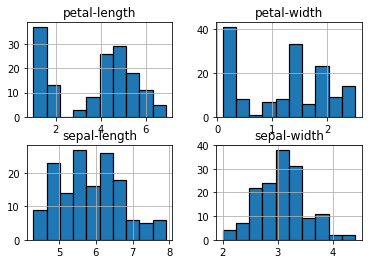

In [8]:
iris.hist(edgecolor='black', linewidth=1.2)

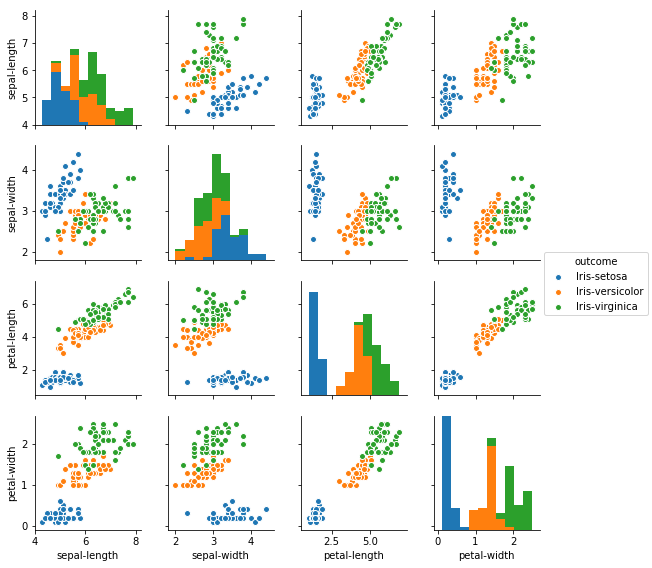

In [9]:
sns.pairplot(data=iris, hue="outcome", size=2)

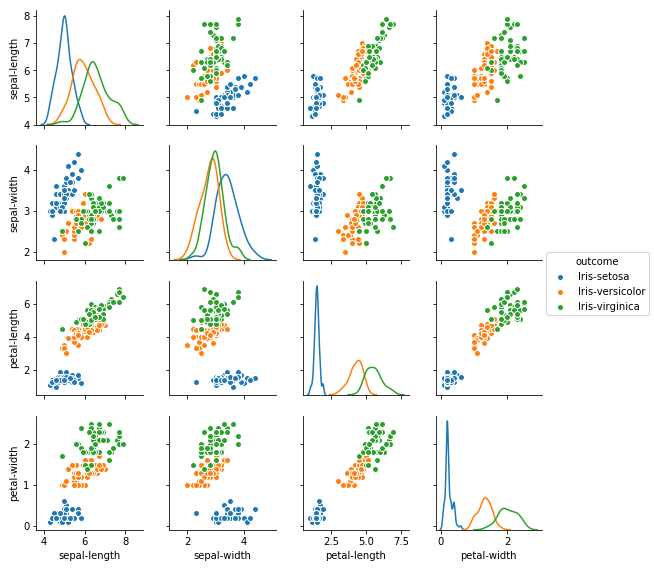

In [10]:
sns.pairplot(iris, hue="outcome", size=2, diag_kind="kde")

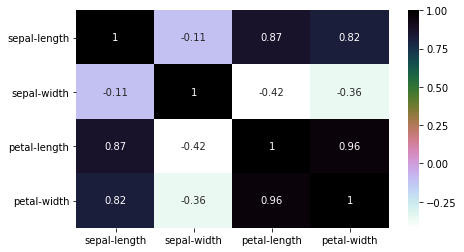

In [11]:
# Plot heatmap which shows correlations
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

### Phase 02 - Data Cleaning

In [12]:
iris.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
outcome         0
dtype: int64

In [13]:
iris.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
outcome         0
dtype: int64

In [14]:
# replace text outcomes classes with numerical data

cleanup_nums = {"outcome": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica" : 2}}

iris.replace(cleanup_nums, inplace=True)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,outcome
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Phase 03 - Feature Selection

In [15]:
# features
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
X = iris[features]

# responses
y = iris.outcome

### Phase 04 - Model Selection

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [17]:
# model list
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("LR", LogisticRegression()))
models.append(("SVC", SVC()))
models.append(("GB", GradientBoostingClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))

In [18]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=7)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name' : names, 'Score' : scores })
print(kf_cross_val)

  Name     Score
0  KNN  0.966667
1   LR  0.953333
2  SVC  0.980000
3   GB  0.960000
4   RF  0.966667
5   DT  0.960000
6  BNB  0.333333
7  GNB  0.953333


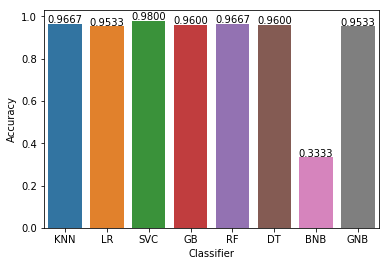

In [19]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

### Phase 05 - Feature Engineering

In [20]:
from sklearn.feature_selection import RFECV

In [21]:
# RFECV doesn't work with the kernel (rbf)

svc = SVC(kernel='linear')

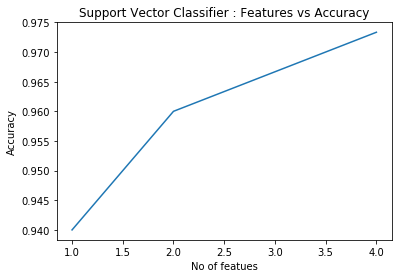

In [22]:
rfecv = RFECV(estimator=svc, step=1, cv=strat_k_fold, scoring="accuracy")
rfecv.fit(X, y)

# plot the RFE graph
plt.figure()
plt.title("Support Vector Classifier : Features vs Accuracy")
plt.xlabel("No of featues")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [23]:
feature_importance = list(zip(features, rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['sepal-length', 'sepal-width', 'petal-length', 'petal-width']


### Phase 06 - Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# param grid

c_values = list(np.arange(1, 10))

param_grid = {'kernel' : ['rbf', 'linear', 'poly'], 'C' : c_values}

In [26]:
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=strat_k_fold, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear', 'poly'], 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [27]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'C': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [28]:
svc_new = SVC(C=1, kernel='rbf')

In [29]:
score = cross_val_score(estimator=svc_new, X=X, y=y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy score : {}".format(score))

Final accuracy score : 0.9800000000000001


## Clustering